In [1]:
from qiskit.circuit import *
import numpy as np
from qiskit_aer import StatevectorSimulator
from qiskit.result import marginal_counts
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.visualization.state_visualization import _bloch_multivector_data
from qiskit.quantum_info import random_statevector, Statevector


In [2]:
def kft(n:int, qc:QuantumCircuit):
    assert qc.num_qubits >= n
    print(qc.qubits)
    for i in range(n-1,-1,-1):
        qc.h(i)
        for j in range(i):
            qc.cp(np.pi/2**(i-j),control_qubit=j,target_qubit=i)

    for i in range(n//2):
        qc.swap(i,n-1-i)
    qc.barrier()

In [3]:
n: int = 3
x: int = 5
init_vals = [(x & 1<<i)>>i for i in range(n)]

qc = QuantumCircuit(n)
for _ in range(n):
    qc.initialize(random_statevector(2),_)
    # if init_vals[_]:
    #     qc.x(_)



In [4]:
init_state = Statevector.from_instruction(qc)
print(init_state)

Statevector([ 0.09095522+0.01665139j, -0.03322423-0.02768489j,
              0.28356589+0.55397344j,  0.0117944 -0.29082688j,
              0.0774087 +0.05639665j, -0.01857239-0.04076215j,
              0.01581349+0.64439634j,  0.14164346-0.26613015j],
            dims=(2, 2, 2))


[Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)]


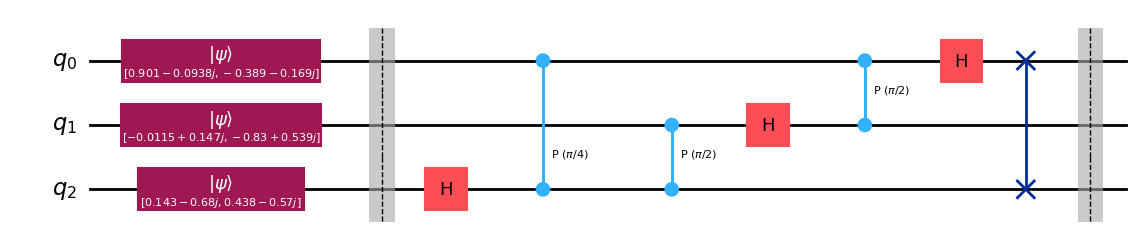

In [5]:
qc.barrier()
kft(n,qc)
qc.draw(output='mpl')

In [6]:
final_state = Statevector.from_instruction(qc)
print(final_state)

Statevector([ 0.20130784+0.22840035j,  0.06846292+0.05393097j,
             -0.21903532-0.47042267j, -0.05307434-0.15428556j,
              0.12943662+0.67062781j,  0.00505457+0.10729443j,
              0.12639341-0.32529997j, -0.00128547-0.06314812j],
            dims=(2, 2, 2))


In [7]:
# Verify by the definition of QFT
# works with any states
# Discrete fft use the minus sign in the exponent, so qft is equal to the orthonormal inverse discrete fft
print(np.array(np.fft.ifft(np.array(init_state),norm='ortho')))
print(np.array(final_state))

[ 0.20130784+0.22840035j  0.06846292+0.05393097j -0.21903532-0.47042267j
 -0.05307434-0.15428556j  0.12943662+0.67062781j  0.00505457+0.10729443j
  0.12639341-0.32529997j -0.00128547-0.06314812j]
[ 0.20130784+0.22840035j  0.06846292+0.05393097j -0.21903532-0.47042267j
 -0.05307434-0.15428556j  0.12943662+0.67062781j  0.00505457+0.10729443j
  0.12639341-0.32529997j -0.00128547-0.06314812j]
